In [1]:
# project: p10
# submitter-netid: cjohnstone
# partner-netid: mwodnicki

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import requests
import json
import os
import pickle
import collections
import matplotlib

In [3]:
%matplotlib inline

In [4]:
world_data = pd.read_json("https://tyler.caraza-harter.com/cs301/spring19/data/countries.json")

In [5]:
if not os.path.isdir("json_info"):
    os.makedirs("json_info")

In [6]:
#q1
area_list = world_data["area"]
area_list.sum()

127493303

In [7]:
#q2
manifest = requests.get("https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt")
manifest.raise_for_status()
manifest_list = manifest.text
manifest_list = manifest_list.split("\n")
manifest_list = manifest_list[:-1]
manifest_list[0]

'Brazil_Peru.json'

In [8]:
#q3
def get_json(URL):
    file_list = URL.split("/")
    file_name = file_list[-1]
    if os.path.exists(os.path.join("json_info", file_name)):
        with open(os.path.join("json_info", file_name), "r") as file:   
            data2 = eval(file.readline())
        return  data2
    path_contents = requests.get(URL)
    something = path_contents.json()
    with open(os.path.join("json_info", file_name), "w") as file:
        file.write(str(something))
    with open(os.path.join("json_info", file_name), "r") as file:   
        data2 = eval(file.readline())
    return data2
list1 = []
capital_rows = []
for i in manifest_list:
    list1 = get_json("https://tyler.caraza-harter.com/cs301/spring19/data/capitals/"+i)
    for j in list1:
        capital_rows.append(j)
capital_rows

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [9]:
#q4
capitals = DataFrame(capital_rows)
bermuda = capitals.loc[capitals["country"]=="Bermuda"]
bermuda.iloc[0]["capital"]

'Hamilton'

In [10]:
#q5
maputo = capitals.loc[capitals["capital"]=="Maputo"]
maputo.iloc[0]["country"]

'Mozambique'

In [11]:
#q6
south=capitals.sort_values("latitude",ascending=True)[:5]
countries=[]
for num in range(5):
    countries.append(south.iloc[num]["country"])
countries

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [12]:
#q7
north=capitals.sort_values("latitude",ascending=False)[:3]
countries=[]
for num in range(3):
    countries.append(north.iloc[num]["country"])
countries

['Iceland', 'Finland', 'Norway']

In [13]:
#q8
world_data.describe()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,net-migration,population
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,7.285332e+05,22.536114,10.833657,9.654971,9781.714286,38.052743,0.123314,3.588318e+07
std,2.005565e+06,11.287090,38.245751,5.187216,10612.928974,35.369320,4.466356,1.333418e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,-13.920000,7.502000e+03
25%,2.779000e+04,12.635000,0.090000,6.075000,1900.000000,8.550000,-0.905000,2.033239e+06
50%,1.431000e+05,20.340000,0.440000,8.230000,5100.000000,24.180000,0.000000,7.523934e+06
75%,5.209850e+05,30.200000,3.150000,11.965000,14450.000000,62.155000,0.770000,2.272283e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,23.060000,1.313974e+09


In [14]:
#q9
lit = world_data.loc[:,["literacy","phones"]]
for num in range(175):
    lit["literacy"] = lit["literacy"].replace([lit.iloc[num]["literacy"]], float(str(lit.iloc[num]["literacy"]).replace(",",".")))
for num in range(175):
    lit["phones"] = lit["phones"].replace([lit.iloc[num]["phones"]], float(str(lit.iloc[num]["phones"]).replace(",",".")))
lit.describe()

,literacy,phones
count,175.000000,175.000000
mean,82.182286,214.621143
std,20.086897,218.613971
min,17.600000,1.300000
25%,69.950000,31.300000
50%,92.000000,140.100000
75%,98.000000,329.700000
max,100.000000,1035.600000


In [15]:
def max_landlock_country(cont):
    info_dict = {}
    country_data = collections.namedtuple("country_data", "coastline area continent country")
    landlock = world_data.loc[:,["coastline",'area','country','continent']]
    for row in range(len(landlock)):
        data = country_data(coastline = landlock.iloc[row]["coastline"], area = landlock.iloc[row]["area"], continent = landlock.iloc[row]["continent"], country = landlock.iloc[row]["country"])
        for country in data:
            if data[0] == 0.0:
                if data[2] == cont:
                    info_dict.update({data[3]:data[1]})
        area = list(info_dict.values())
        country = list(info_dict.keys())
    return country[area.index(max(area))]
max_landlock_country("Europe")

'Belarus'

In [16]:
#q10
max_landlock_country("Europe")

'Belarus'

In [17]:
#q11
max_landlock_country("Africa")

'Chad'

In [18]:
#q12
max_landlock_country("South America")

'Bolivia'

In [19]:
#taken from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    return c * r



In [20]:
#q13
haversine(-89.411893, 43.070231, -89.384113, 43.074645)

1.433899492072933

In [21]:
def distance_between(country1, country2):
    lat_1 = 0
    lon_1 = 0
    lat_2 = 0
    lon_2 = 0
    for row in range(len(capitals)):
        if capitals.iloc[row]["country"] == country1:
            lat_1 = capitals.iloc[row]["latitude"]
            lon_1 = capitals.iloc[row]["longitude"]
        if capitals.iloc[row]["country"] == country2:
            lat_2 = capitals.iloc[row]["latitude"]
            lon_2 = capitals.iloc[row]["longitude"]
    distance = haversine(lon_1, lat_1, lon_2, lat_2)
    return(distance)


In [22]:
#q14
distance_between("India", "Brazil")

8840.574141306946

In [23]:
#q15
def distance_finder(items):
    q15_dict = {}
    for country1 in items:
        for country2 in items:
            if country1 not in q15_dict:
                val=distance_between(country1,country2)
                if val == 0.0:
                    val= float("NaN")
                q15_dict.update({country1:{country2:val }})
            else:
                val=distance_between(country1,country2)
                if val == 0.0:
                    val= float("NaN")
                q15_dict[country1].update({country2: val})
    return DataFrame(q15_dict)
distance_finder(['Chile', 'Guyana', 'Colombia'])

,Chile,Guyana,Colombia
Chile,NaN,2897.553095,2636.644599
Colombia,2636.644599,1105.066312,NaN
Guyana,2897.553095,NaN,1105.066312


In [24]:
#q16
SA_countries = world_data.loc[:,["country", "continent"]]
SA = SA_countries.loc[SA_countries["continent"]== "South America"]
country_list = list(SA["country"])
distances=distance_finder(country_list)
distances

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455702,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036442
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455702,669.926372,1326.758656,1467.253638,906.799256
Brazil,1869.737031,1709.071018,2275.516286,1572.674233,NaN,1342.297074,2228.690680,1459.139733,1967.770515,2344.584922,1412.096335,908.185709
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064118,2696.149591,823.054491,NaN,2791.196721,2218.650964
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Paraguay,963.635535,2214.288286,2337.615967,2153.855447,908.185709,906.799256,2544.799572,646.036442,1558.635236,2218.650964,667.699386,NaN
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674233,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447


In [25]:
#q17
distances_2 = distances.mean(0)
nearest_sa = distances_2.min()
distances_2[distances_2 == nearest_sa].index[0]

'Bolivia'

In [26]:
#q18
distances_2 = distances.mean(0)
nearest_sa = distances_2.max()
distances_2[distances_2 == nearest_sa].index[0]

'Uruguay'

In [27]:
country_name = distances.idxmin()
country_distance = distances.min()

In [28]:
#q19
q19_dict = {}
countName=[]
countDist=[]
for row in country_list:
    countName.append(country_name[row])
    countDist.append(country_distance[row])
q19_dict.update({"nearest":countName, "distance": countDist})
rowName = pd.Index(country_list)  
df = pd.DataFrame(data=q19_dict, index=rowName)
df

,nearest,distance
Chile,Argentina,690.784168
Guyana,Suriname,215.336336
Colombia,Ecuador,451.004119
Suriname,Guyana,215.336336
Brazil,Paraguay,908.185709
Bolivia,Peru,669.926372
Venezuela,Colombia,639.361118
Argentina,Uruguay,143.069943
Peru,Bolivia,669.926372
Ecuador,Colombia,451.004119


In [29]:
#q20
country_distance=distances.max()
country_name=distances.idxmax()
q20_dict = {}
countName=[]
countDist=[]
for row in country_list:
    countName.append(country_name[row])
    countDist.append(country_distance[row])
q20_dict.update({"furthest":countName, "distance": countDist})
rowName = pd.Index(country_list)  
df = pd.DataFrame(data=q20_dict, index=rowName)
df

,furthest,distance
Chile,Venezuela,3043.657689
Guyana,Chile,2897.553095
Colombia,Uruguay,2962.230943
Suriname,Chile,2895.810776
Brazil,Ecuador,2344.584922
Bolivia,Venezuela,1865.131181
Venezuela,Uruguay,3207.352176
Argentina,Venezuela,3157.624051
Peru,Uruguay,2046.571589
Ecuador,Uruguay,2791.196721


In [30]:
import sqlite3
conn = sqlite3.connect('countries.db')
world_data.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

def qry(sql):
    return pd.read_sql(sql, conn)

In [31]:
#q21
data=qry("SELECT continent, COUNT() AS [number of countries] FROM countries GROUP by continent ORDER By [number of countries]")
data

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


In [32]:
%matplotlib inline

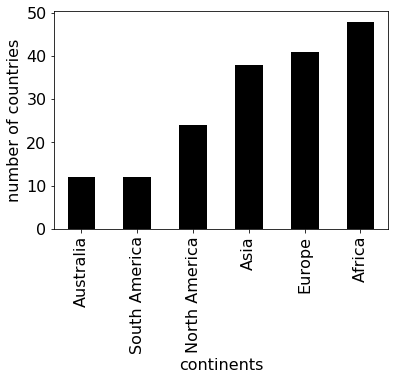

In [33]:
#q22
import matplotlib, pandas
import operator
import collections
q22_dict={}
for index, row in data.iterrows():
    q22_dict.update({row["continent"]:row["number of countries"]})
def plot_dict(d, y, x):
    ax = pandas.Series(d).plot.bar(color="black", fontsize=16)
    ax.set_ylabel(y, fontsize=16)
    ax.set_xlabel(x, fontsize=16)
plot_dict(q22_dict,"number of countries","continents")

In [34]:
#qry("SELECT * FROM countries")

In [35]:
#q23
data=qry("SELECT continent, SUM(population)/1000000.0 AS [total population (million)] FROM countries GROUP by continent ORDER By [total population (million)] DESC")
data

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


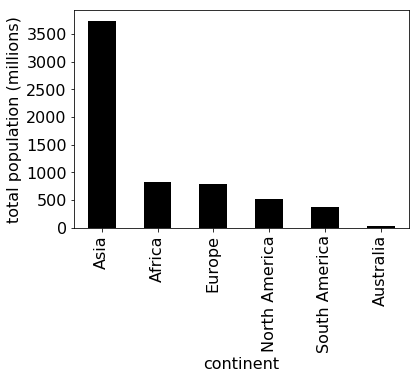

In [36]:
#q24
q24_dict={}
for index, row in data.iterrows():
    q24_dict.update({row["continent"]:row["total population (million)"]})
plot_dict(q24_dict,"total population (millions)","continent")

In [37]:
#q25
qry("SELECT country, population FROM countries WHERE continent = 'Australia' ORDER By population DESC" )

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [38]:
#q26
money=qry("SELECT country, population*[gdp-per-capita]/1000000000.000000 AS [real GDP (billion)] FROM countries ORDER By [real GDP (billion)] DESC LIMIT 10")
money

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


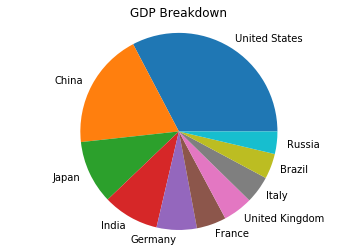

In [39]:
#q27
import matplotlib.pyplot as plotter
pieLabels=[]
populationShare=[]
for index, row in money.iterrows():
    pieLabels.append(row["country"])
    populationShare.append(row["real GDP (billion)"])
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,labels=pieLabels)
axesObject.set_title("GDP Breakdown")
axesObject.axis('equal')
plotter.show()

In [40]:
#q28
gap=qry("SELECT country, [birth-rate], [death-rate] FROM countries ORDER By [birth-rate]-[death-rate] DESC LIMIT 10" )
gap

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


(0, 100)

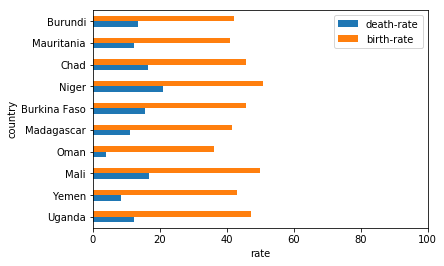

In [41]:
#q29
country=[]
death=[]
birth=[]
for index, row in gap.iterrows():
    country.append(row["country"])
    death.append(row["death-rate"])
    birth.append(row["birth-rate"])
    df=pd.DataFrame({'death-rate': death, 'birth-rate': birth}, index=country)
ax=df.plot.barh()
ax.set_ylabel("country")
ax.set_xlabel("rate")
ax.set_xlim(0,100)

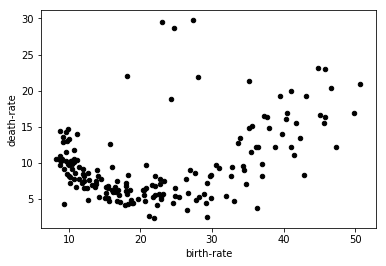

In [42]:
#q30
relationship=qry("SELECT country, [birth-rate], [death-rate] FROM countries" )
death=[]
birth=[]
for index, row in gap.iterrows():
    death.append(row["death-rate"])
    birth.append(row["birth-rate"])
ax=relationship.plot.scatter(x="birth-rate", y="death-rate",c="black")

In [43]:
#q31
outliers=qry("SELECT country, [birth-rate], [death-rate] FROM countries WHERE [birth-rate]<30 AND [death-rate]>16 ORDER By [birth-rate] LIMIT 6" )
outliers

,country,birth-rate,death-rate
0,South Africa,18.20,22.00
1,Botswana,23.08,29.50
2,Namibia,24.32,18.86
3,Lesotho,24.75,28.71
4,Swaziland,27.41,29.74
5,Zimbabwe,28.01,21.84


In [44]:
#q32
relationship1=relationship.corr()
relationship1.iloc[0]["death-rate"]

0.40037782919521714

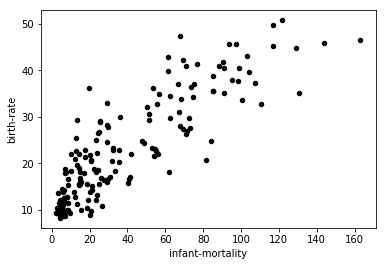

In [45]:
#q33
birthinfant=qry("SELECT [birth-rate], [infant-mortality] FROM countries" )
infant=[]
birth=[]
for index, row in birthinfant.iterrows():
    infant.append(row["infant-mortality"])
    birth.append(row["birth-rate"])
ax=birthinfant.plot.scatter(x="infant-mortality", y="birth-rate",c="black")

In [46]:
#q34
birthinfant1=birthinfant.corr()
birthinfant1.iloc[0]["infant-mortality"]

0.8687265678031416

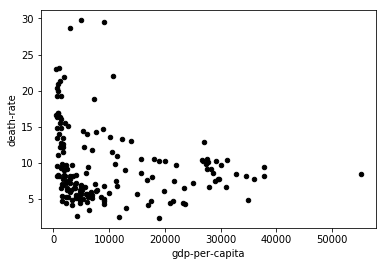

In [47]:
#q35
gdpdeath=qry("SELECT [death-rate], [gdp-per-capita] FROM countries" )
death=[]
gdp=[]
for index, row in gdpdeath.iterrows():
    death.append(row["death-rate"])
    gdp.append(row["gdp-per-capita"])
ax=gdpdeath.plot.scatter(x="gdp-per-capita", y="death-rate",c="black")

In [48]:
#q36
gdpdeath1=gdpdeath.corr()
gdpdeath1.iloc[0]["gdp-per-capita"]

-0.20995846867456752

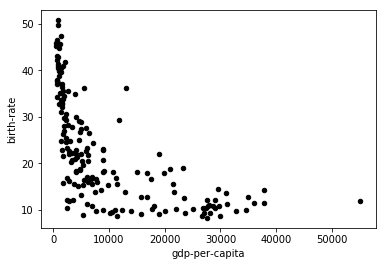

In [49]:
#q37
gdpbirth=qry("SELECT [birth-rate], [gdp-per-capita] FROM countries" )
birth=[]
gdp=[]
for index, row in gdpbirth.iterrows():
    birth.append(row["birth-rate"])
    gdp.append(row["gdp-per-capita"])
ax=gdpbirth.plot.scatter(x="gdp-per-capita", y="birth-rate",c="black")

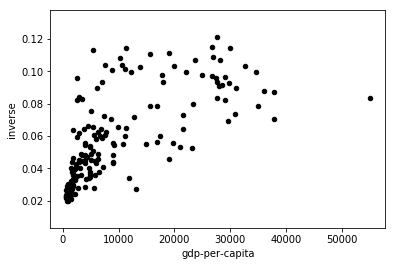

In [50]:
#q38
gdpbirth1=qry("SELECT 1/[birth-rate] AS inverse, [gdp-per-capita] FROM countries" )
birth=[]
gdp=[]
for index, row in gdpbirth1.iterrows():
    birth.append(row["inverse"])
    gdp.append(row["gdp-per-capita"])
ax=gdpbirth1.plot.scatter(x="gdp-per-capita", y="inverse",c="black")

In [51]:
#q39
import numpy as np
gdpbirth2=qry("SELECT 1/[birth-rate] AS [inverse-birth-rate], [gdp-per-capita] FROM countries" )
birth=[]
gdp=[]
for index, row in gdpbirth2.iterrows():
    birth.append(row["inverse-birth-rate"])
    gdp.append(row["gdp-per-capita"])

df = DataFrame({
    "gdp-per-capita": gdp,
    "inverse-birth-rate": birth
})
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse-birth-rate"], rcond=None)

coefficients = res[0] 
m_coefficient = coefficients[0]
n_coefficient = coefficients[1] 
(m_coefficient,n_coefficient)

(1.8422394400496387e-06, 0.039035043649535375)

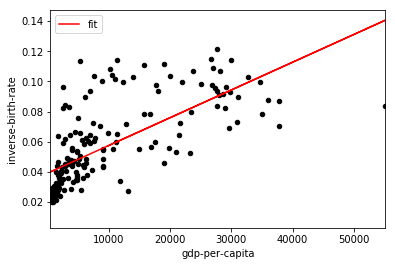

In [52]:
#q40
ax = df.plot.scatter(x="gdp-per-capita", y="inverse-birth-rate", c="black")

df["fit"] = df["gdp-per-capita"] * m_coefficient + n_coefficient
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)